# <center> Une (pas si) courte introduction à Pandas et Seaborn

<img align="center" src="https://perso.univ-lemans.fr/~ywalko/img/R209/panda.jpg"  width=50% />

## Table des matières
1. [Principales méthodes de manipulation de données avec Pandas](#sec1)
    1. [Chargement des données et premier aperçu](#sec1.1)
    1. [Trier les données](#sec1.2)
    1. [Indexation et récupération des données](#sec1.3)
    1. [Aggrégations](#sec1.4)
    1. [Tableaux de synthèse](#sec1.5)
    1. [Transformations de dataFrame](#sec1.6)
    1. [Gérer l'absence de données](#sec1.7)
1. [Visualisation de données avec Seaborn](#sec2)
    1. [Statistique univariée](#sec2.1)
        1. [Variable qualitative nominale](#sec2.1.1)
        1. [Variable qualitative ordinale](#sec2.1.2)
        1. [Variable quantitative discrète](#sec2.1.3)
        1. [Variable quantitative continue](#sec2.1.4)
    1. [Statistique bivariée](#sec2.2)
        1. [Une variable qualitative et une variable quantitative](#sec2.2.1)
        1. [Deux variables qualitatives](#sec2.2.2)
        1. [Deux variables quantitatives](#sec2.2.3)
    1. [Encore plus de variables pour plus de plaisir !](#sec2.3)


## 1. Principales méthodes de manipulation de données avec Pandas<a class="anchor" id="sec1"></a>
Il existe beaucoup de tutoriels sur la librairie Pandas et la visualisation de données. À travers ce notebook, nous réaliserons une analyse de données avec les méthodes les plus utilisées. Elles pourront vous servir pour les futurs exercices mais aussi vos futures analyses.

**[Pandas](http://pandas.pydata.org)** est une bibliothèque Python qui fournit des méthodes pour l'analyse de données. Les spécialistes des données travaillent souvent avec des données stockées dans des formats de table comme `.csv`, `.tsv` ou `.xlsx`. Pandas rend très pratique pour le chargement, le traitement et l'analyse de ces données tabulaires à l'aide de requêtes de type SQL. En conjonction avec `Matplotlib` et `Seaborn`, `Pandas` offre un large éventail de possibilités d'analyse visuelle des données tabulaires.

Les principales structures de données de `Pandas` sont implémentées avec les classes **Series** et **DataFrame**. La première est un tableau indexé unidimensionnel de certains types de données fixes. La seconde est une structure de données bidimensionnelle - un tableau - où chaque colonne contient des données du même type. Vous pouvez le voir comme un dictionnaire d'instances de "Séries". Les **DataFrames** sont parfaits pour représenter des données réelles : les lignes correspondent à des *individus* de la population observée et les colonnes correspondent aux *variables* observées sur ces individus.

In [3]:
import numpy as np
import pandas as pd

### A. Chargement des données et premier aperçu<a class="anchor" id="sec1.1"></a>

Nous démontrerons les principales méthodes en action en analysant un jeu de données sur les passagers du titanic. Chargeons les données (en utilisant `read_csv`) et regardons les 5 premières lignes en utilisant la méthode `head` :

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exercice :** Affichons quelques informations sur notre dataset.
- `df.shape` permet d'afficher la taille du DataFrame
- `df.columns` permet d'afficher le nom des colonnes du DataFrame
- `df.info()` permet d'avoir des informations sur le typage de données

In [5]:
# Utiliser shape

# A compléter

Quelle est ici la taille de la population étudiée ? Combien de variables étudie-t-on sur chacun des individus ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

In [6]:
# Utiliser columns

# A compléter

In [7]:
# Utiliser info()

# A compléter

`int64`, `float64` et `object` sont les types de nos données. Avec cette même méthode, nous pouvons facilement voir s'il y a des valeurs manquantes. Ici par exemple, on voit qu'il y a des données manquantes pour les variables **Age**, **Cabin** et **Embarked**. Nous verrons plus tard comment y remédier.

La méthode `describe()` montre les caractéristiques statistiques de base de chaque variable numérique (types `int64` et `float64`) : nombre de valeurs non manquantes, moyenne, écart-type, plage, médiane, quartiles 0,25 et 0,75. Cela peut vous permettre de voir s'il y a des valeurs aberrantes (âge négatif, âge supérieur à 120 ans, etc.)

In [8]:
# Utiliser describe()

# A compléter

Quelle est la moyenne d'âge de la population étudiée ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

Afin de voir les statistiques sur les caractéristiques non numériques, il faut indiquer explicitement les types de données qui nous intéressent dans le paramètre `include`.

In [9]:
df.describe(include=['object','bool'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Quelle est le mode de la variable **Sex** ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>


### B. Tri des données<a class="anchor" id="sec1.2"></a>

Une DataFrame peut être triée par la valeur d'une des variables (c'est-à-dire des colonnes). Par exemple, nous pouvons trier par *Fare* (utilisez "ascendant=False" pour trier par ordre décroissant) :


In [10]:
df.sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


Nous pouvons également trier par plusieurs colonnes :

In [11]:
df.sort_values(by=['Fare', 'Age'],
        ascending=[False, True]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


### C. Indexation et récupération des données<a class="anchor" id="sec1.3"></a>

Une DataFrame peut être indexée de différentes manières.

Pour obtenir une seule colonne, vous pouvez utiliser `DataFrame['Nom']` ou `DataFrame.Nom`. Utilisons ceci pour répondre à une question sur cette seule colonne :

**Quelle est l'âge moyen des passagers ?**

In [12]:
df['Age'].mean()

29.69911764705882

In [13]:
df.Age.mean()

29.69911764705882


**Quelle est le tarif maximum payé ?**



In [14]:
## A compléter

<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

**L'indexation booléenne** avec une colonne est également très pratique. La syntaxe est `df[P(df['Nom'])]`, où `P` est une condition logique qui est vérifiée pour chaque élément de la colonne `Nom'. Le résultat d'une telle indexation est le DataFrame composé uniquement de lignes qui satisfont à la condition "P" de la colonne "Name".

Utilisons-le pour répondre à la question :

**Quel est l'âge moyen des hommes ?**

In [15]:
df[df.Sex == "male"].Age.mean()

30.72664459161148


**Quelle est le tarif maximum payé par une femme de moins de 30 ans ?**



In [16]:
## A compléter



<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

Les DataFrames peuvent être indexées par le nom de la colonne ou le nom de la ligne (index) ou par le numéro de série d'une ligne. La méthode `loc` est utilisée pour **l'indexation par nom**, tandis que `iloc()` est utilisé pour **l'indexation par numéro**.

Dans le premier cas ci-dessous, nous avons *"donnez-nous les valeurs des lignes avec un indice de 0 à 5 (inclus) et des colonnes PassengerId à Pclass (inclus) "*. Dans le second cas, nous disons *"donnez-nous les valeurs des cinq premières lignes des trois premières colonnes "*.

- Afficher les colonnes de _PassengerId_ à _Pclass_ code avec l'indexation par nom

In [17]:
df.loc[0:5, 'PassengerId':'Pclass']

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3
5,6,0,3


- Afficher les colonnes de _PassengerId_ à _Pclass_ code avec l'indexation par numéro

In [18]:
df.iloc[0:5, 0:3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


Si nous avons besoin de la première ou de la dernière ligne de notre DataFrame, nous pouvons utiliser la construction `df[:1]` ou `df[-1 :]`
- Afficher la dernière ligne du DataFrame

In [19]:
df[-1:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


La méthode `apply` peut également utilisée pour appliquer une fonction à chaque ligne. Pour ce faire, il faut spécifier "axis=1". Les fonctions lambda sont très pratiques dans de tels scénarios. Par exemple, si nous devons sélectionner tous les noms commençant par W, nous pouvons le faire comme ceci :

In [20]:
df[df.Name.apply(lambda name: name[0] == 'W')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.50,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.50,C52,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.00,NaN,S


- Afficher les 5 premières lignes avec les noms terminant par 'y'

In [21]:
df[df.Name.apply(lambda name: name[-1] == 'y')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


La méthode `map` peut être utilisée pour **remplacer des valeurs dans une colonne** en passant un dictionnaire de la forme `{old_value : new_value}` comme argument.
- Remplacer *female* par *femme* et *male* par *homme*

In [22]:
d = {'female' : 'femme', 'male' : 'homme'}
df.Sex = df.Sex.map(d)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",homme,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homme,35.0,0,0,373450,8.0500,NaN,S


- **Exercice :** À vous de jouer : Remplacer 0 par 'Non' et 1 par 'Oui' dans la colonne *Survived*

In [23]:
## A compléter

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",homme,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homme,35.0,0,0,373450,8.0500,NaN,S



### D. Aggrégations<a class="anchor" id="sec1.4"></a>

En général, le regroupement des données dans Pandas fonctionne comme suit :



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. Premièrement, la méthode `groupby` divise les `grouping_columns` par leurs valeurs. Elles deviennent un nouvel index dans le cadre de données résultant.
2. Ensuite, les colonnes d'intérêt sont sélectionnées (`colonnes_à_montrer`). Si les `colonnes_à_montrer` ne sont pas incluses, toutes les clauses non groupby seront incluses.
3. Enfin, une ou plusieurs fonctions sont appliquées aux groupes obtenus par les colonnes sélectionnées.

Voici un exemple où nous regroupons les données en fonction des valeurs de la variable `Sex` et affichons les statistiques de deux colonnes **Age** et **Fare** dans chaque groupe :

In [24]:
columns_to_show = ['Age', 'Fare']

df.groupby(['Sex'])[columns_to_show].describe()

Age                                                       Fare  \
       count       mean        std   min   25%   50%   75%   max  count   
Sex                                                                       
femme  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0  314.0   
homme  453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0  577.0   

                                                                     
            mean        std   min        25%   50%    75%       max  
Sex                                                                  
femme  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292  
homme  25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292

Faisons la même chose, mais légèrement différemment en passant une liste de fonctions à `agg()` :
- Utiliser les fonction de numpy mean, std, min et max pour faire cela

In [25]:
columns_to_show = ['Age', 'Fare']

df.groupby(['Sex'])[columns_to_show].agg([np.mean,np.std])

<ipython-input-25-9d813f680c72>:3: FutureWarning: The provided callable <function mean at 0x788519dfd000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Sex'])[columns_to_show].agg([np.mean,np.std])
<ipython-input-25-9d813f680c72>:3: FutureWarning: The provided callable <function std at 0x788519dfd120> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(['Sex'])[columns_to_show].agg([np.mean,np.std])
<ipython-input-25-9d813f680c72>:3: FutureWarning: The provided callable <function mean at 0x788519dfd000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Sex'])[columns_to_show].agg([np.

Age                  Fare           
            mean        std       mean        std
Sex                                              
femme  27.915709  14.110146  44.479818  57.997698
homme  30.726645  14.678201  25.523893  43.138263


### E. Tableaux de synthèse<a class="anchor" id="sec1.5"></a>

#### distribution des effectifs : 1 variable

Pour les caractéristiques catégorielles (type `objet`) et booléennes (type `bool`), nous pouvons utiliser la méthode `value_counts` pour visualiser la distribution des effectifs. Regardons la distribution de `Sex` :

In [26]:
df.Sex.value_counts()

,count
Sex,
homme,577
femme,314


577 passagers sur les 891 étaint des hommes. Pour calculer les fréquences, passez `normalize=True` à la fonction `value_counts`.

In [27]:
df.Sex.value_counts(normalize=True)

,proportion
Sex,
homme,0.647587
femme,0.352413


C'est également possible pour une variable quantitative, on peut même préciser les classes pour une variable continue. Il faut alors ajouter `sort_index()` pour que l'ordre des classes soit bien respecté.

In [28]:
df.Age.value_counts(bins = range(0,100,5)).sort_index()

,count
"(-0.001, 5.0]",44
"(5.0, 10.0]",20
"(10.0, 15.0]",19
"(15.0, 20.0]",96
"(20.0, 25.0]",122
"(25.0, 30.0]",108
"(30.0, 35.0]",88
"(35.0, 40.0]",67
"(40.0, 45.0]",47
"(45.0, 50.0]",39


#### distribution des effectifs : 2 variables

Supposons que nous voulions voir comment les observations de notre échantillon sont réparties dans le contexte de deux variables : *Sex* et *Survived*. Pour ce faire, nous pouvons construire un **tableau de contingence** en utilisant la méthode des tableaux croisés :


In [29]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
femme,81,233
homme,468,109


Si on souhaite regrouper les valeurs d'une des variables en classes, on peut utiliser la commande `pd.cut()` comme dans l'exemple ci-dessous.

In [30]:
pd.crosstab(pd.cut(df.Age, bins=range(0,100,5)), df.Sex)

Sex,femme,homme
Age,,
"(0, 5]",21,23
"(5, 10]",10,10
"(10, 15]",12,7
"(15, 20]",34,62
"(20, 25]",45,77
"(25, 30]",36,72
"(30, 35]",30,58
"(35, 40]",25,42
"(40, 45]",18,29


On peut même ajouter les marges :

In [31]:
pd.crosstab(pd.cut(df.Age, bins=range(0,100,5)), df.Sex, margins = True, margins_name = "Total")

Sex,femme,homme,Total
Age,,,
"(0, 5]",21,23,44
"(5, 10]",10,10,20
"(10, 15]",12,7,19
"(15, 20]",34,62,96
"(20, 25]",45,77,122
"(25, 30]",36,72,108
"(30, 35]",30,58,88
"(35, 40]",25,42,67
"(40, 45]",18,29,47


- **Exercice :** Faire la même chose avec les variables *Survived* et *Pclass*

In [32]:
## A compléter

Cela ressemble à des **tableaux croisés dynamiques** pour ceux qui sont familiers avec Excel. Et, bien sûr, les tableaux croisés dynamiques sont implémentés dans Pandas : la méthode `pivot_table` prend les paramètres suivants :

* `valeurs` - une liste de variables pour lesquelles on peut calculer des statistiques,
* `index` - une liste de variables pour regrouper les données,
* `Aggfunc` - les statistiques que nous devons calculer pour les groupes, par exemple la somme, la moyenne, le maximum, le minimum ou autre chose.

Examinons l'âge moyen et le prix payé moyen en fonction du sexe :

In [33]:
df.pivot_table(['Age', 'Fare'],
               ['Sex'], aggfunc=['mean'])

mean           
             Age       Fare
Sex                        
femme  27.915709  44.479818
homme  30.726645  25.523893

- **Exercice :** Faire la même chose en fonction de la variable 'Survived'

In [34]:
## A compléter


### F. Transformations de dataFrame<a class="anchor" id="sec1.6"></a>

Il est possible d'ajouter une colonne de la façon suivante :

In [35]:
df['Ecart'] = df.Age.mean() - df.Age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ecart
0,1,0,3,"Braund, Mr. Owen Harris",homme,22.0,1,0,A/5 21171,7.2500,NaN,S,7.699118
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.0,1,0,PC 17599,71.2833,C85,C,-8.300882
2,3,1,3,"Heikkinen, Miss. Laina",femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.699118
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.0,1,0,113803,53.1000,C123,S,-5.300882
4,5,0,3,"Allen, Mr. William Henry",homme,35.0,0,0,373450,8.0500,NaN,S,-5.300882


Pour supprimer des colonnes ou des lignes, utilisez la méthode "drop", en passant les index requis et le paramètre "axis" ("axis=1" si vous supprimez des colonnes, et rien ou "axis=0" si vous supprimez des lignes). L'argument "inplace" indique s'il faut changer le DataFrame original. Avec `inplace=False`, la méthode `drop` ne change pas le DataFrame existant et renvoie un nouveau DataFrame avec des lignes ou des colonnes supprimées. Avec `inplace=True`, elle modifie le DataFrame.

- **Exercice :** Supprimer la colonne 'Ecart' que nous venons de créer

In [36]:
## A compléter

- Nous souhaitons avoir une colonne intitulée 'Person' spécifiant si la personne est un homme, une femme ou un enfant (si l'âge est < 16 ans) :
    - Ajoutons une colonne 'Person' contenant une copie de la colonne 'Sex'
    - puis modifions les valeurs de sorte que si l'âge est < 16, alors la valeur soit égale à *enfant*

In [37]:
df['Person'] = df.Sex
df.loc[df['Age'] < 16, 'Person'] = 'Enfant'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ecart,Person
0,1,0,3,"Braund, Mr. Owen Harris",homme,22.0,1,0,A/5 21171,7.2500,NaN,S,7.699118,homme
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.0,1,0,PC 17599,71.2833,C85,C,-8.300882,femme
2,3,1,3,"Heikkinen, Miss. Laina",femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.699118,femme
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.0,1,0,113803,53.1000,C123,S,-5.300882,femme
4,5,0,3,"Allen, Mr. William Henry",homme,35.0,0,0,373450,8.0500,NaN,S,-5.300882,homme


- **Exercice :** Ajouter une colonne intitulée 'Alone' qui vaut 'alone' si le passager est seul et 'with family' si le passager est accompagné (si SibSp ou Parch est différent de 0) :
    - Ajouter une colonne 'Alone' contenant la somme des colonnes **SibSp** et **Parch**
    - modifier les valeurs de sorte que si le nombre est > 0, alors la valeur soit égale à *'with Family'*
    - puis modifier les valeurs de sorte que si le nombre est = 0, alors la valeur soit égale à *'alone'*

In [38]:
## A compéléter


### G. Gérer l'absence de données<a class="anchor" id="sec1.7"></a>

On a vu au début que certaines données étaient manquantes. On peut soit décider de les supprimer, soit décider de les remplacer par une valeur.

Par exemple, pour certains passagers, l'âge n'est pas renseigné. On peut alors décider de remplacer les NaN par la moyenne par exemple.

In [39]:
df.Age.isna().sum() # compte le nombre de valeurs absentes pour la variable Age

177

In [40]:
df.Age=df.Age.fillna(df.Age.mean()) # remplace les NaN par la moyenne de la variable Age

In [41]:
df.Age.isna().sum() # il n'y a plus de NA

0

Un autre moyen de visualiser les données manquantes est d'utiliser la fonction `isna()` directement sur le jeu de données et d'en faire la somme.

In [42]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


La variable *Embarked* a 2 valeurs manquantes, nous allons suprimmer les 2 lignes correspondantes du jeu de données à l'aide de la fonction `dropna()`

In [43]:
df = df.dropna(subset=['Embarked'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  Ecart        712 non-null    float64
 13  Person       889 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 104.2+ KB


Nous avons supprimé 2 lignes du jeu de données qui ne contient désormais plus que 889 lignes. Attention à ne pas abuser de cette solution qui a l'inconvénient de supprimer certaines données.

## 2. Visualisation de données avec seaborn<a class="anchor" id="sec2"></a>


Dans cette partie, nous allons utiliser la librairie Seaborn pour visualiser les données sur les passagers du Titanic. Commençons par expliciter chaque variable du jeu de données.


| Variable | Definition| Type|
|:-:|:-:|:-:|
|Survived|Non: n'a pas survécu / Oui: a survécu|qualitative nominale|
| Pclass | 1: 1ère classe / 2: 2ème classe / 3: 3ème classe|qualitative ordinale|
|Name| Nom du passager|qualitative ordinale|
|Sex| homme ou femme|qualitative nominale|
|Age| Âge du passager|quantitative continue|
|Sibsp| Nombre de frêre(s)/soeur(s)/époux(se) à bord|quantitative discrète|
|Parch| Nombre de parent(s)/enfant(s) à bord|quantitative discrète|
|Ticket|Numéro du ticket|qualitative ordinale|
|Fare|Prix payé|quantitative continue|
|Cabin|Numéro de cabine|qualitative nominale|
|Embarked|Port d'embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)|qualitative nominale||
|Person|homme ou femme ou enfant|qualitative nominale|
|Alone| voyage seul (alone) ou en famille (with family)|qualitative nominale|


puis chargeons la librairie **seaborn** :

In [45]:
import seaborn as sns

## A. Statistique univariée<a class="anchor" id="sec2.1"></a>

### a. Variable qualitative nominale<a class="anchor" id="sec2.1.1"></a>

Intéressons nous à la variable **Survived**. Commençons par donner la distribution des effectifs à l'aide de la commande `value_counts()`.

In [46]:
df.Survived.value_counts()

,count
Survived,
0,549
1,340


Quel est le mode de la variable `Survived` ? avec quel effectif ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

Calculer maintenant la distribution des fréquences à l'aide du paramètre `normalize=True`.

In [47]:
df.Survived.value_counts(normalize=True)

,proportion
Survived,
0,0.617548
1,0.382452


Quelle est la proportion de passagers ayant survécu au naufrage du Titanic en pourcentage ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

Nous allons maintenant dessiner le diagramme en bâtons de cette distribution à l'aide de la fonction `sns.catplot()` avec le type `count`

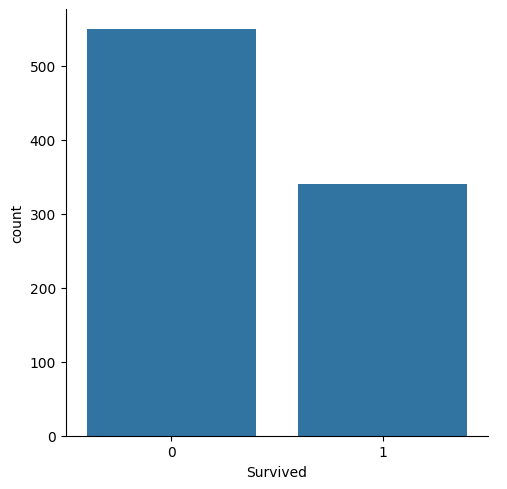

In [48]:
sns.catplot(x='Survived', data=df, kind='count')

Nous pouvons facilement modifier les textes des axes et du titre de la façon suivante.

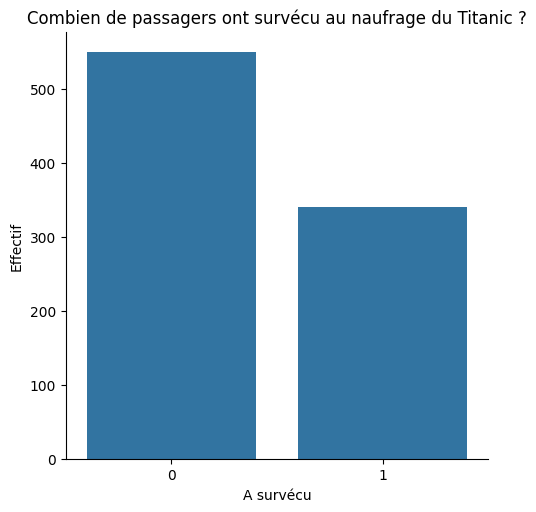

In [49]:
g = sns.catplot(x='Survived', data=df, kind='count')
g.set(xlabel='A survécu',
      ylabel='Effectif',
      title='Combien de passagers ont survécu au naufrage du Titanic ?')

### b. Variable qualitative ordinale<a class="anchor" id="sec2.1.2"></a>

Intéressons nous à la variable **Pclass**. Commençons par donner la distribution des effectifs à l'aide de la commande `value_counts()`.

In [50]:
df.Pclass.value_counts()

,count
Pclass,
3,491
1,214
2,184


Le tableau est trié par effectif décroissant. Pour le trier selon les modalités, nous pouvons utiliser la fonction `sort_index()`

In [51]:
df.Pclass.value_counts().sort_index()

,count
Pclass,
1,214
2,184
3,491


**Exercice :** Calculer maintenant la distribution des fréquences à l'aide du paramètre `normalize=True`.

In [52]:
## A compléter

**Exercice :** Dessiner le diagramme en bâtons de cette distribution en prenant soin de donner un titre et des noms cohérents aux axes.

In [53]:
## A compléter

### c. Variable quantitative discrète<a class="anchor" id="sec2.1.3"></a>

Intéressons nous à la variable **SibSp** (nombre frêre(s)/soeur(s)/époux(se) à bord). Commençons par donner la distribution des effectifs à l'aide de la commande `value_counts()`.

In [54]:
df.SibSp.value_counts().sort_index()

,count
SibSp,
0,606
1,209
2,28
3,16
4,18
5,5
8,7


puis dessinons le diagramme en bâtons.

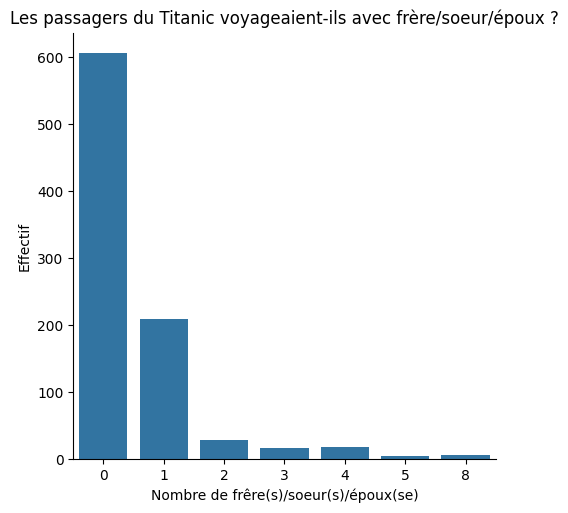

In [55]:
g = sns.catplot(x='SibSp', data=df, kind='count')
g.set(xlabel='Nombre de frêre(s)/soeur(s)/époux(se)',
      ylabel='Effectif',
      title='Les passagers du Titanic voyageaient-ils avec frère/soeur/époux ?')

Puisque c'est une variable quantitative, nous pouvons en plus calculer sa moyenne, sa variance, son écart-type ainsi que ses quartiles à l'aide des fonctions suivantes :

In [56]:
df.SibSp.mean()

0.5241844769403825

In [57]:
df.SibSp.var()

1.2181644524164283

In [58]:
df.SibSp.std()

1.1037048755969272

In [59]:
print("Q1 = ",df.SibSp.quantile(q=0.25))
print("Q2 = M = ",df.SibSp.quantile(q=0.5))
print("Q3 = ",df.SibSp.quantile(q=0.75))

Q1 =  0.0
Q2 = M =  0.0
Q3 =  1.0


ou afficher toutes ces informations d'un seul coup avec la fonction `describe()`

In [60]:
df.SibSp.describe()

,SibSp
count,889.000000
mean,0.524184
std,1.103705
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


Nous pouvons tracer la courbe des fréquences cumulées à l'aide de la fonction `displot()` et l'option `kind='ecdf'`

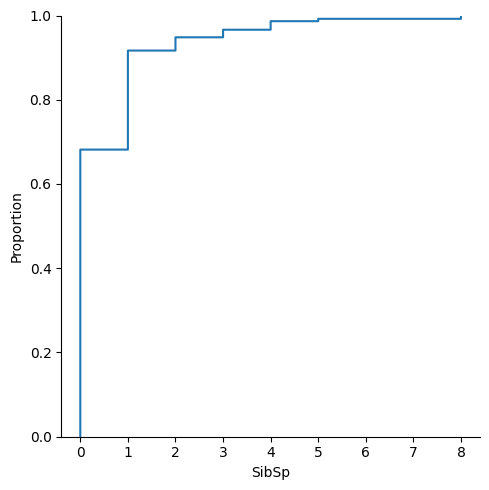

In [61]:
sns.displot(x='SibSp', data = df, kind = 'ecdf')

et enfin la boîte à moustaches avec la commande `sns.catplot()` mais avec le type `box`.

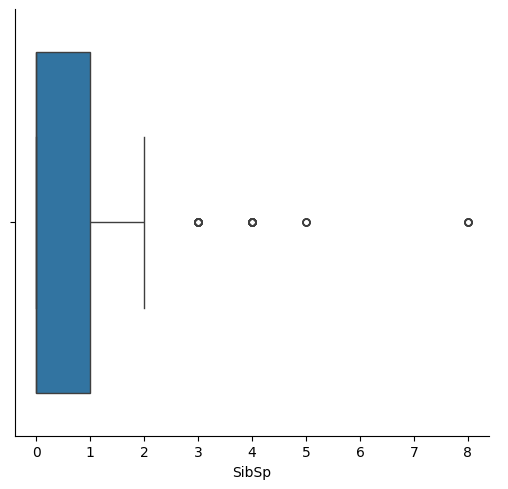

In [62]:
sns.catplot(data = df,x = 'SibSp', kind = 'box')

**Exercice :** Etudier la variable **Parch** (nombre de parents / enfants à bord) en éditant et exécutant les blocs suivants.

In [63]:
## Distibution des effectifs

## A compléter

In [64]:
## Diagramme en bâtons

## A compléter

In [65]:
## Calcul des données statistiques (moyenne, écrat-type, quartiles, etc.)

## A compléter

In [66]:
## Affichage du boxplot

## A compléter

### d. Variable quantitative continue<a class="anchor" id="sec2.1.4"></a>

Intéressons nous à la variable **Age**. Commençons par donner la distribution des effectifs à l'aide de la commande `value_counts()` en spécifiant les classes dans le paramètre `bins`.

In [67]:
df.Age.value_counts(bins = range(0,100,5)).sort_index()

,count
"(-0.001, 5.0]",44
"(5.0, 10.0]",20
"(10.0, 15.0]",19
"(15.0, 20.0]",96
"(20.0, 25.0]",122
"(25.0, 30.0]",285
"(30.0, 35.0]",88
"(35.0, 40.0]",66
"(40.0, 45.0]",47
"(45.0, 50.0]",39


Dessinons maintenant l'histogramme, avec les mêmes classes.

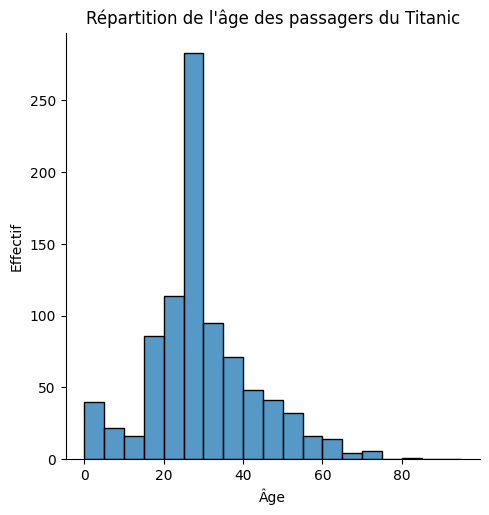

In [68]:
g = sns.displot(x = df.Age, bins = range(0,100,5), kind = 'hist')
g.set(title = "Répartition de l'âge des passagers du Titanic",
     xlabel="Âge",
     ylabel="Effectif")

On peut remarquer qu'il s'agit de l'histogramme des effectifs. On peut aussi donner les classes explicitement et d'amplitudes différentes, il faut alors préciser l'option `stat='density'` pour que l'histogramme soit donné avec les densités.

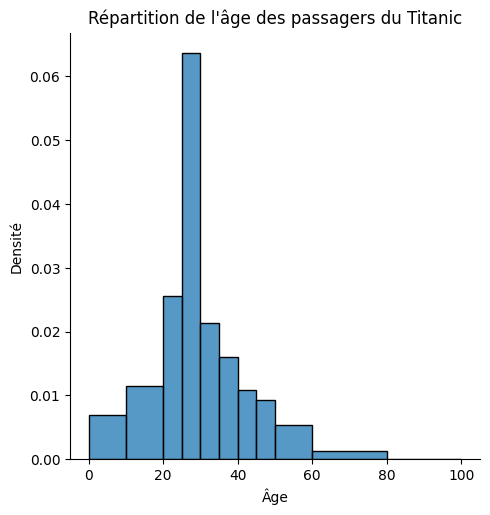

In [69]:
g = sns.displot(x = df.Age, bins = [0,10,20,25,30,35,40,45,50,60,80,100], kind = 'hist', stat='density')
g.set(title = "Répartition de l'âge des passagers du Titanic",
     xlabel="Âge",
     ylabel="Densité")

Nous pouvons tracer la courbe des fréquences cumulées à l'aide de la fonction `displot()` et l'option `kind='ecdf'` (notez que c'est une courbe en escalier qui est tracée et non la courbe linéaire par morceaux comme vu en cours, cette courbe est plus précise car tracée à partir de la série brute et non à partir du regroupement par classes).

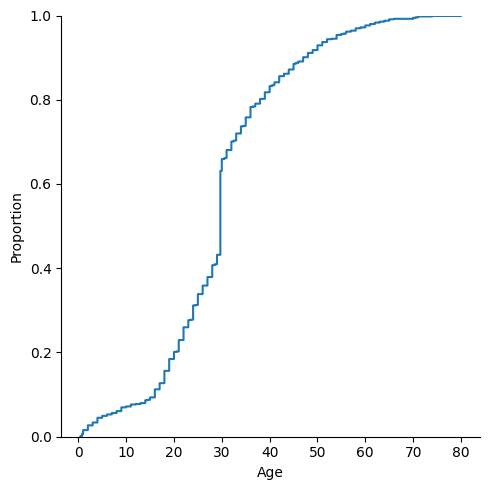

In [70]:
sns.displot(x = df.Age, kind = 'ecdf')

Terminons par le tracé de la boîte à moustaches :

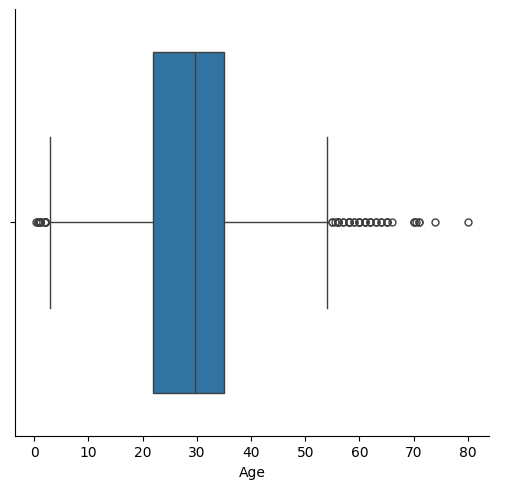

In [71]:
sns.catplot(data = df, x = 'Age', kind='box')

**Exercice :** Etudier la variable **Fare** (Prix du billet) en éditant et exécutant les blocs suivants.

In [72]:
## Distibution des effectifs avec des classes adaptées

## A compléter

In [73]:
## Histogramme avec des classes adaptées

## A compléter

In [74]:
## Calcul des données statistiques (moyenne, écrat-type, quartiles, etc.)

## A compléter

In [75]:
## Affichage du boxplot

## A compléter

## B. Statistique bivariée<a class="anchor" id="sec2.2"></a>

Il est temps de passer à la statistique bivariée. Nous verrons comment visualiser l'impact d'une variable qualitative sur une variable quantitative en jouant avec la couleur du tracé, ou la disposition de sous-graphes. Nous verrons également comment faire un test du $\chi^2$ sur un couple de variables qualitatives pour tester leur indépendance et comment faire une régression linéaire sur un couple de variables quantitatives.

### a. Une variable qualitative et une variable quantitative<a class="anchor" id="sec2.2.1"></a>

Étudions le couple de variables **Age** et **Sex** afin de comparer la distribution des âges en fonction du sexe du passager. Nous commençons par afficher la table de contingence en regroupant les valeurs de **Age** en classes.

In [76]:
pd.crosstab(pd.cut(df.Age, bins=range(0,100,5)), df.Sex, margins = True, margins_name = "Total")

Sex,femme,homme,Total
Age,,,
"(0, 5]",21,23,44
"(5, 10]",10,10,20
"(10, 15]",12,7,19
"(15, 20]",34,62,96
"(20, 25]",45,77,122
"(25, 30]",89,196,285
"(30, 35]",30,58,88
"(35, 40]",24,42,66
"(40, 45]",18,29,47


Pour afficher l'histogramme de la variable **Age** en visualisant en même temps la variable **Sex**, on peut utiliser le paramètre `col` ou `row` pour disposer les différents histogrammes en colonne ou en ligne.

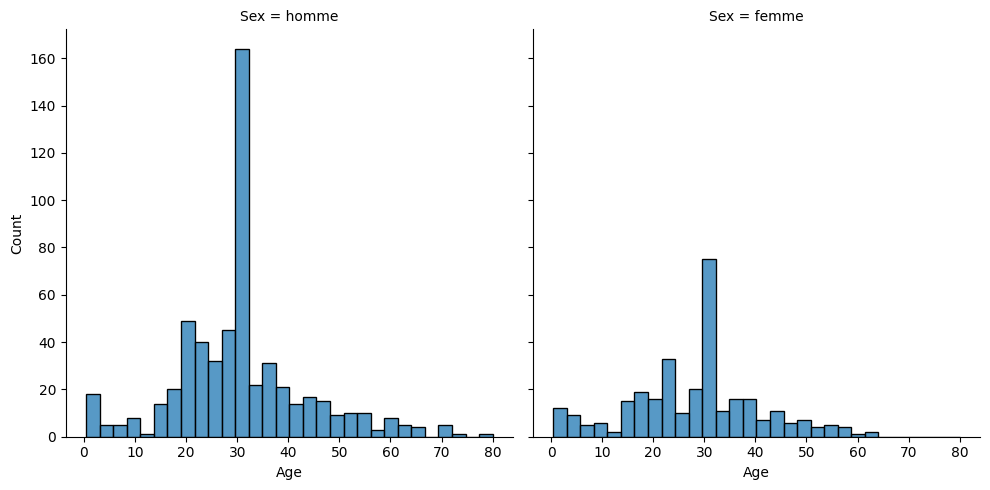

In [77]:
sns.displot(data = df, x = 'Age', col = 'Sex', kind = 'hist')

Une autre possibilité est d'afficher un seul histogramme mais de jouer sur la couleur (`hue`) pour distinguer les modalités de la variable qualitative **Sex**. Il est alors préférable d'utiliser le paramètre `multiple='stack'` afin d'empiler les 2 histogrammes.

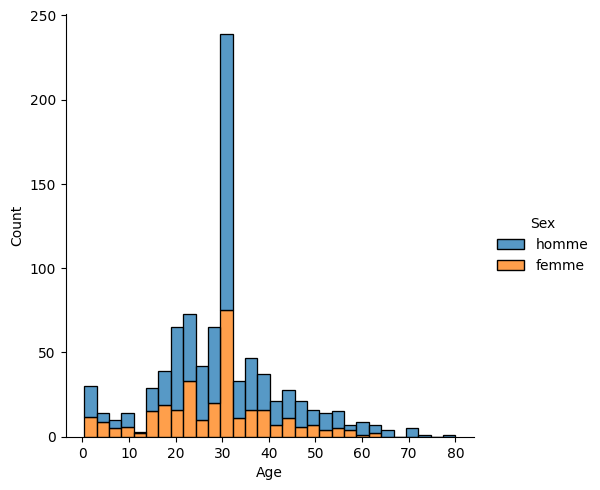

In [78]:
sns.displot(data = df, x = 'Age', hue = 'Sex', multiple = 'stack', kind = 'hist')

Si on souhaite plutôt *superposer* les deux distributions, alors il est souvent préférable d'utiliser la courbe de densité `kind='kde'` à l'histogramme, le résultat sera plus lisible. C'est une sorte d'histogramme *lissé*.

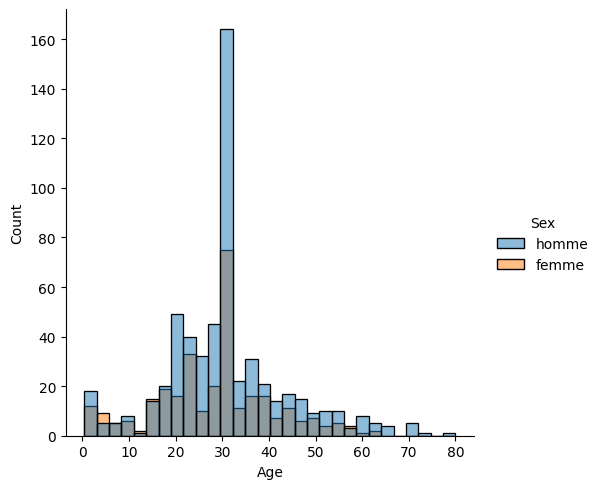

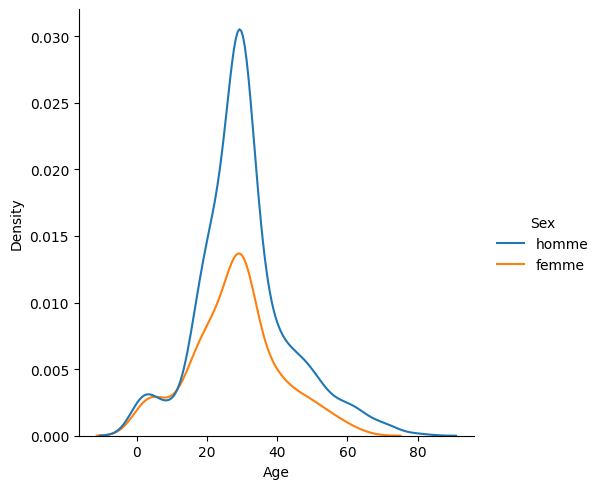

In [79]:
sns.displot(data = df, x = 'Age', hue = 'Sex', kind = 'hist') # les 2 histogrammes superposés, pas très lisible...
sns.displot(data = df, x = 'Age', hue = 'Sex', kind = 'kde')  # les courbes à densité superposées, plus clair !

On peut également dessiner les boîtes à moustaches, en les dessinant sur le même graphique, ce qui facilite grandement la comparaison.

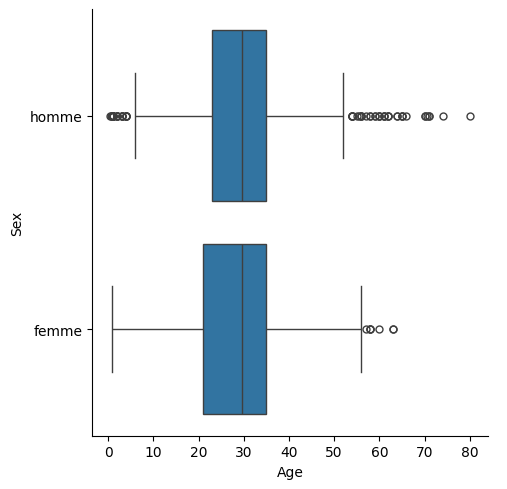

In [80]:
sns.catplot(data = df, x = 'Age', y = 'Sex', kind = 'box')

D'autres types de graphiques peuvent être intéressants, par exemple le diagramme ci-dessous permet de comparer la moyenne de l'**Age** en fonction de la variable **Sex**.

<ipython-input-81-85f794ae5926>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data = df, x = 'Sex', y = 'Age', kind = 'bar', ci=None) # calcule la moyenne pour chaque catégorie


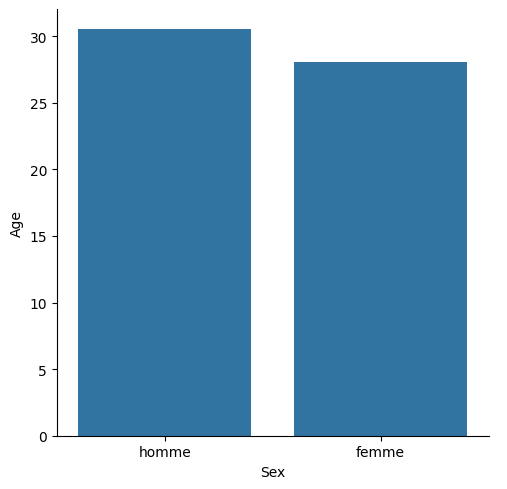

In [81]:
sns.catplot(data = df, x = 'Sex', y = 'Age', kind = 'bar', ci=None) # calcule la moyenne pour chaque catégorie

**Exercice :** Etudier le couple de variables **Fare** et **Survived** en éditant et exécutant les blocs suivants.

In [82]:
## Table de contingence

## A compléter

In [83]:
## Histogramme ou densité

## A compléter

In [84]:
## Affichage du boxplot

## A compléter

In [85]:
## Moyenne du prix payé en fonction du fait de survivre ou non

## A compléter

### b. Deux variables qualitatives<a class="anchor" id="sec2.2.2"></a>

Étudions le couple de variables **Survived** et **Sex** afin d'étudier la survie des passagers en fonction de son sexe. Nous commençons par afficher la table de contingence.

In [86]:
pd.crosstab(df.Survived, df.Sex, margins = True, margins_name = "Total")

Sex,femme,homme,Total
Survived,,,
0,81,468,549
1,231,109,340
Total,312,577,889


Les hommes semblent avoir moins survécu que les femmes. Pour s'en convaincre, calculons les fréquences conditionnelles selon la variable **Sex**, à l'aide du paramètre `normalize='columns'`.

In [87]:
pd.crosstab(df.Survived, df.Sex, margins_name = "Total", normalize='columns')

Sex,femme,homme
Survived,,
0,0.259615,0.811092
1,0.740385,0.188908


Nous pouvons visualiser cette différence de distribution à l'aide d'un diagramme en bâtons sur lequel on utilise la couleur pour faire apparaître la variable **Survived**.

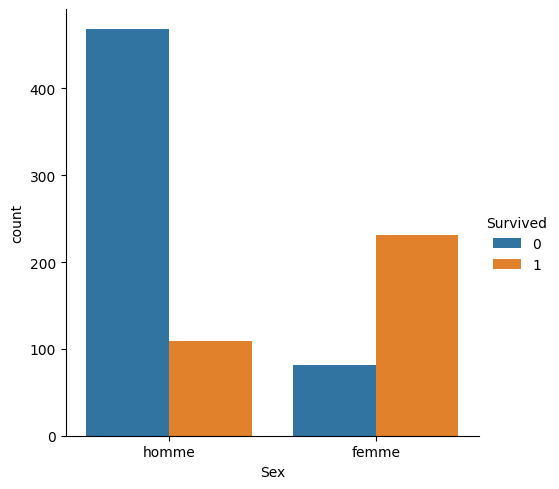

In [88]:
sns.catplot(data = df, x = 'Sex', hue = 'Survived', kind='count')

Ces résultats donnent à penser que les variables **Sex** et **Survived** ne sont pas indépendantes, i.e. que le sexe a un impact sur le fait d'avoir survécu ou non. Confirmons cette impression en faisant un test du $\chi^2$.

Pour cela, nous allons utiliser la fonction `chi2_contingency` du package `scipy.stats` qui prend en entrée un tableau de contingence et renvoie :
- c : la valeur du $\chi^2$ calculée
- p : la p-value (c'est la probabilité de trouver cette valeur de $\chi^2$ sous l'hypothèse d'indépendance des 2 variables
- dof : c'est le degré de liberté
- expected : ce sont les valeurs théoriques qu'on aurait observées sous l'hypothèse d'indépendance des 2 variables.

Dans la pratique, on choisit souvent un seuil d'erreur de 5%, et donc :
- on rejettera l'hypothèse d'indépendance si la p-value est < 5%
- et on ne rejettera pas l'hypothèse d'indépendance si la p-value est > 5%

In [89]:
contingence = pd.crosstab(df.Sex,df.Survived)

In [90]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingence)

In [91]:
print("p-value =",p)
print("valeur du chi2 =",c)
print("degrés de liberté =",dof)
print("valeurs théoriques sous l'hypothèses d'indépendance =",expected)

p-value = 3.7799096665576e-58
valeur du chi2 = 258.4266104463763
degrés de liberté = 1
valeurs théoriques sous l'hypothèses d'indépendance = [[192.67491564 119.32508436]
 [356.32508436 220.67491564]]


On obtient ici une p-value très faible, ce qui signifie que le fait d'avoir survécu ou non au naufrage du Titanic est fortement dépendant du sexe du passager.

Il existe un moyen de visualiser les écarts entre les observations et les valeurs théoriques sous l'hypothèse d'indépendance : la `heatmap`. Plus la couleur d'une case est claire, plus les valeurs sont proches des valeurs théoriques sous l'hypothèse d'indépendance. Plus la couleur est foncée, plus les valeurs sont éloignées.

<Axes: xlabel='Survived', ylabel='Sex'>

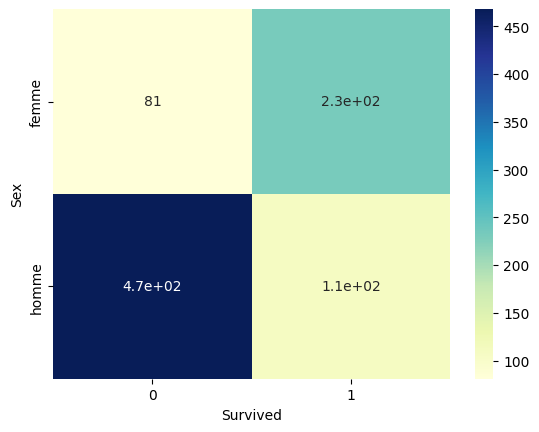

In [92]:
sns.heatmap(contingence, annot=True, cmap="YlGnBu")

Ce graphique nous permet de visualiser d'un seul coup d'oeil que le fait d'être un homme a un gros impact sur le fait de ne pas avoir survécu au naufrage.

**Exercice.** Utiliser les blocs suivants pour étudier le lien entre la classe (**Pclass**) et le fait de survivre ou non au naufrage.

In [93]:
## Table de contingence (avec fréquences conditionnées par la variable Pclass)

## A compléter

In [94]:
## Diagramme en bâtons qui permet de voir l'impact de la classe sur le fait de d'avoir survécu ou non

## A compléter

In [95]:
## test du chi2

## A compléter

Quelle est votre interprétation du résultat obtenu ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

In [96]:
## Heatmap

## A compléter

Quelle est votre interprétation du résultat obtenu ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

### c. Deux variables quantitatives<a class="anchor" id="sec2.2.3"></a>

Pour cette dernière catégorie, les données du Titanic ne sont pas très adaptées, nous allons donc travailler sur un autre jeu de données contenant des informations sur différentes espèces d'iris.

Commençons par charger ce jeu de données et par visualiser les premières lignes.

In [97]:
df = pd.read_csv('Iris.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

Pour chaque fleur, nous avons les informations suivantes :
- longueur du sépale (variable quantitative continue)
- largeur du sepale (variable quantitative continue)
- longueur du pétale (variable quantitative continue)
- largeur du pétale (variable quantitative continue)
- espèce (variable qualitative nominale)

Nous pouvons dessiner le nuage de points correspondant à la longueur et la largeur du pétale à l'aide de la commande `relplot `.

In [ ]:
sns.relplot(data=df, x="PetalLengthCm", y="PetalWidthCm")

On voit ici que ces données semblent suivre une droite, nous pouvons donc faire une régression linéaire par la méthode des moindres carrés à l'aide de la fonction `linregress` de la librairie `scipy.stats`.

In [ ]:
from scipy.stats import linregress
a, b, r, p_value, std_err = linregress(df.PetalLengthCm, df.PetalWidthCm)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

$a$ et $b$ sont les coefficients de la droite de régression obtenue $y=ax+b$ et $r$ est le coefficient de corrélation. Sa valeur est ici proche de 1 ce qui signifie que la droite est plutôt proche des points.

On peut la tracer en même temps que le nuage de points à l'aide de la fonction `lmplot`.

In [ ]:
sns.lmplot(data=df, x="PetalLengthCm", y="PetalWidthCm")

**Exercice :** Etudier le couple de variables **SepalLengthCm** et **SepalWidthCm** en éditant et exécutant les blocs suivants.

In [ ]:
## Nuage de points

## A compléter

In [ ]:
## Calcul de la droite de régression et du coefficient de régression

## A compléter

In [ ]:
## Calcul de la droite de régression et du coefficient de régression

## A compléter

Quelle est votre interprétation du résultat obtenu ?
<div style="background-color:rgba(0, 255, 0, 0.19);padding:3%;">
<b>Réponse : </b>
</div>

## C. Encore plus de variables pour plus de plaisir !<a class="anchor" id="sec2.3"></a>

Il est possible de créer des graphiques avec plus de 2 variables, en utilisant la couleur ou la présentation sous forme de tableau. En voici quelques exemples mais il y a bien d'autres possibilités !

On peut par exemple visualiser l'espèce sur le nuage de points précédent en utilisant la couleur.

In [ ]:
sns.relplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue = 'Species')

La régression linéaire s'appliquera alors sur chaque espèce de façon indépendante.

In [ ]:
sns.lmplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue = 'Species')

Revenons au jeu de données du Titanic pour quelques exemples supplémentaires.

In [ ]:
df = pd.read_csv('titanic.csv')

Il y a souvent plusieurs graphiques qui permettent de visualiser les mêmes informations.

Par exemple, pour étudier le fait d'avoir survécu en fonction du sexe et de la classe, on peut faire plusieurs diagrammes bâtons disposés en ligne ou en colonne :

In [ ]:
sns.catplot(data = df, x = 'Sex', hue = 'Survived', col='Pclass', kind='count')

on peut choisir de représenter toutes les informations sur un seul graphique en bâtons, qui montre la proportion de survivants dans chaque catégorie :

In [ ]:
sns.catplot(data=df, x="Sex", y="Survived", hue="Pclass", kind="bar", ci = None)

Les mêmes informations peuvent encore être représentées par un nouveau type de graphique, encore plus compact.

In [ ]:
sns.catplot(data=df, x="Sex", y="Survived", hue="Pclass", kind="point", ci=None)

 A vous de choisir celui qui vous semble le plus parlant !

**Exercice :** Choisissez un jeu de données sur le site https://www.kaggle.com puis produisez un notebook Jupyter analysant ces données en veillant à couvrir les types de variables et tout ce que vous avez appris à faire au cours de ce TP.